# Home assignement #1 (Grégoire NOWACKI)

Use the "MobileNet" and "Inception Resnet v2" models from `keras.applications` instead of Resnet 50 to classify images from the webcam or stored as a JPEG file.

Read the documentation for more details on the expected input shape and preprocessing:

https://keras.io/applications/

Measure prediction time using `%%time` to compare to Resnet 50.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from time import time
import numpy as np
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from keras.applications.mobilenet import decode_predictions
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input
from keras.applications.inception_resnet_v2 import decode_predictions
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
from skimage.io import imread
from skimage.transform import resize

tic = time()
model1 = InceptionResNetV2(weights='imagenet')
print("InceptionResNetV2 in {:.3}s".format(time() - tic))

tic = time()
model2 = MobileNet(weights='imagenet')
print("MobileNet in {:.3}s".format(time() - tic))

tic = time()
model3 = ResNet50(weights='imagenet')
print("ResNet50 in {:.3}s".format(time() - tic))

def classify_images(model, image):
    
    plt.imshow(image)
    image_resized = resize(image, (299, 299), preserve_range=True, mode='reflect')
    image_resized_batch = np.expand_dims(image_resized, axis=0)

    preds = model.predict(preprocess_input(image_resized_batch))

    print('\nLabel predictions:\n')
    class_names, confidences = [], []
    for class_id, class_name, confidence in decode_predictions(preds, top=10)[0]:
        print("{} : {:0.3f}".format(class_name, confidence))
    print('\n')

InceptionResNetV2 in 7.42s
MobileNet in 0.891s
ResNet50 in 2.13s


## First image: Laptop

With InceptionResNetV2

Label predictions:

notebook : 0.495
laptop : 0.218
space_bar : 0.049
desktop_computer : 0.022
hand-held_computer : 0.020
modem : 0.010
screen : 0.009
computer_keyboard : 0.005
web_site : 0.003
combination_lock : 0.003


Wall time: 7.79 s


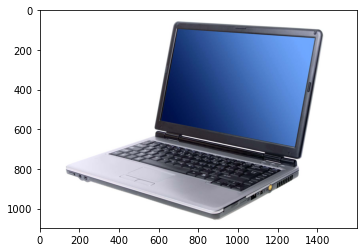

In [108]:
%%time
print('With InceptionResNetV2')
classify_images(model1, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\laptop1.jpg'))

With MobileNet

Label predictions:

notebook : 0.853
laptop : 0.088
screen : 0.018
desktop_computer : 0.009
space_bar : 0.008
hand-held_computer : 0.007
modem : 0.005
monitor : 0.005
computer_keyboard : 0.003
mouse : 0.001


Wall time: 512 ms


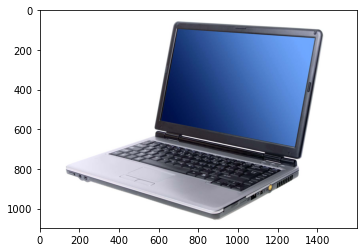

In [110]:
%%time
print('With MobileNet')
classify_images(model2, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\laptop1.jpg'))

With ResNet50

Label predictions:

notebook : 0.262
laptop : 0.128
space_bar : 0.093
modem : 0.054
web_site : 0.050
desktop_computer : 0.039
computer_keyboard : 0.020
hand-held_computer : 0.019
radio : 0.017
screen : 0.014


Wall time: 395 ms


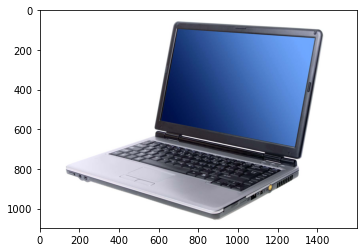

In [7]:
%%time
print('With ResNet50')
classify_images(model3, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\laptop1.jpg'))

## Second image: Golden Retriever

With InceptionResNetV2

Label predictions:

Labrador_retriever : 0.567
golden_retriever : 0.302
kuvasz : 0.004
curly-coated_retriever : 0.003
flat-coated_retriever : 0.003
tennis_ball : 0.002
clumber : 0.001
Chesapeake_Bay_retriever : 0.001
English_setter : 0.001
Brittany_spaniel : 0.001


Wall time: 3.33 s


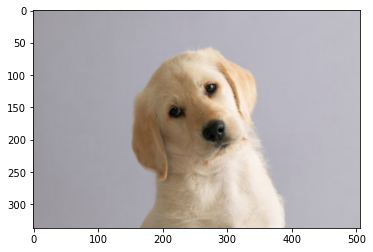

In [111]:
%%time
print('With InceptionResNetV2')
classify_images(model1, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\dog.jpg'))

With MobileNet

Label predictions:

Labrador_retriever : 0.615
golden_retriever : 0.325
beagle : 0.016
vizsla : 0.006
kuvasz : 0.005
otterhound : 0.005
redbone : 0.003
English_foxhound : 0.003
tennis_ball : 0.002
Brittany_spaniel : 0.002


Wall time: 331 ms


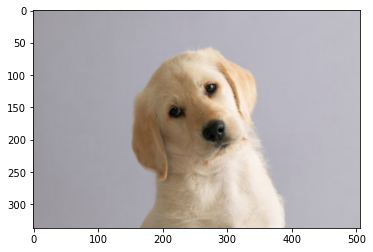

In [112]:
%%time
print('With MobileNet')
classify_images(model2, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\dog.jpg'))

With ResNet50

Label predictions:

Labrador_retriever : 0.452
golden_retriever : 0.350
kuvasz : 0.014
Saluki : 0.010
beagle : 0.006
tennis_ball : 0.005
bath_towel : 0.005
English_foxhound : 0.005
English_setter : 0.004
Brittany_spaniel : 0.004


Wall time: 253 ms


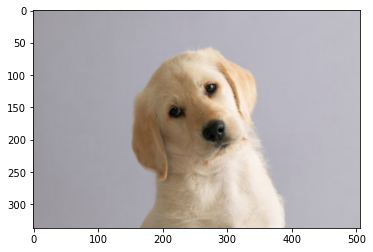

In [8]:
%%time
print('With ResNet50')
classify_images(model3, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\dog.jpg'))

## Third image: Corgi

With InceptionResNetV2

Label predictions:

Pembroke : 0.923
Cardigan : 0.018
Shetland_sheepdog : 0.000
trimaran : 0.000
Norwich_terrier : 0.000
stove : 0.000
Pekinese : 0.000
Chihuahua : 0.000
Dandie_Dinmont : 0.000
hamster : 0.000


Wall time: 8.15 s


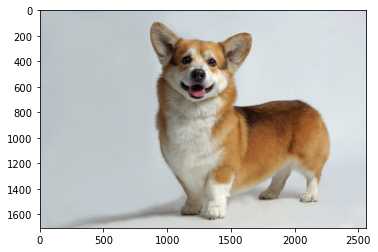

In [113]:
%%time
print('With InceptionResNetV2')
classify_images(model1, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\corgi.jpeg'))

With MobileNet

Label predictions:

Pembroke : 0.879
Cardigan : 0.119
Eskimo_dog : 0.001
Chihuahua : 0.001
dingo : 0.000
dhole : 0.000
Siberian_husky : 0.000
Saint_Bernard : 0.000
beagle : 0.000
red_wolf : 0.000


Wall time: 1.14 s


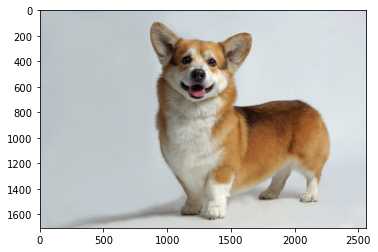

In [114]:
%%time
print('With MobileNet')
classify_images(model2, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\corgi.jpeg'))

With ResNet50

Label predictions:

Pembroke : 0.630
Cardigan : 0.316
dingo : 0.004
Saint_Bernard : 0.003
basenji : 0.003
Eskimo_dog : 0.002
Shetland_sheepdog : 0.002
collie : 0.002
Chihuahua : 0.001
muzzle : 0.001


Wall time: 741 ms


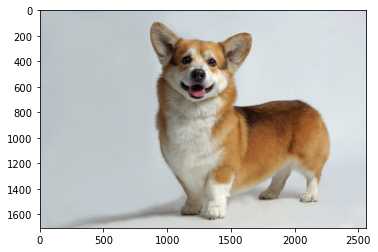

In [9]:
%%time
print('With ResNet50')
classify_images(model3, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\corgi.jpeg'))

## Fourth image: Persian

With InceptionResNetV2

Label predictions:

Persian_cat : 0.956
fig : 0.001
lynx : 0.000
bow_tie : 0.000
tabby : 0.000
Shih-Tzu : 0.000
dumbbell : 0.000
refrigerator : 0.000
Brabancon_griffon : 0.000
Japanese_spaniel : 0.000


Wall time: 4.57 s


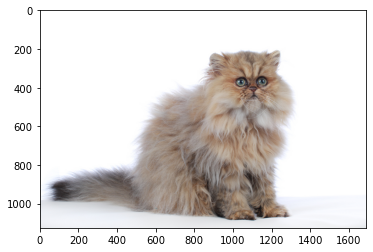

In [115]:
%%time
print('With InceptionResNetV2')
classify_images(model1, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\persan.jpg'))

With MobileNet

Label predictions:

Persian_cat : 0.993
tabby : 0.001
Pomeranian : 0.001
lynx : 0.000
tub : 0.000
paintbrush : 0.000
teddy : 0.000
Angora : 0.000
chow : 0.000
washbasin : 0.000


Wall time: 735 ms


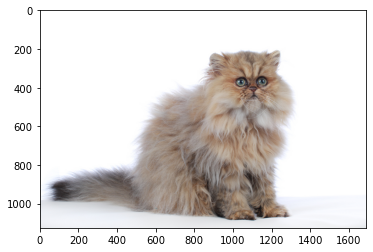

In [116]:
%%time
print('With MobileNet')
classify_images(model2, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\persan.jpg'))

With ResNet50

Label predictions:

Persian_cat : 0.933
lynx : 0.022
tabby : 0.006
Norfolk_terrier : 0.002
chow : 0.001
tiger_cat : 0.001
web_site : 0.001
dishwasher : 0.001
file : 0.001
refrigerator : 0.001


Wall time: 382 ms


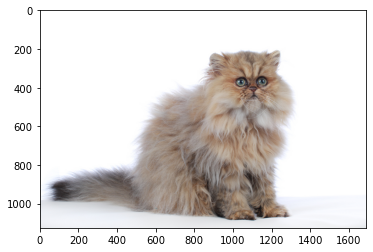

In [10]:
%%time
print('With ResNet50')
classify_images(model3, imread(r'C:\Users\33679\Intro pretrained models for computer vision\resources\persan.jpg'))

## Fifth image: my cat (bad quality picture)

This time, we will use an image from the webcam with MobileNet.


Label predictions:

Persian_cat : 0.752
lynx : 0.033
tabby : 0.022
Angora : 0.019
keeshond : 0.015
doormat : 0.009
Pomeranian : 0.008
tiger_cat : 0.007
Lhasa : 0.006
cairn : 0.005


Wall time: 3.28 s


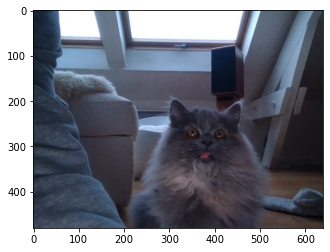

In [122]:
%%time
image = camera_grab(camera_id=0, fallback_filename='laptop.jpeg')
classify_images(model2, image)

It's my cat! She actually is a persian, so we can say that the model works correctly (it was hard to get a proper picture as you can see)

## Results

Thanks to the Wall time, we can see that we get some much faster results with MobileNet than with InceptionResNetV2. The labels that are predicted are pretty similar in both cases.

ResNet50 is the fastest of the three models in terms of prediction time. However, the results are the worst of the three.